In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [5]:
url = "https://www.ptt.cc/bbs/Baseball/index15803.html"

In [6]:
print(url)

https://www.ptt.cc/bbs/Baseball/index15803.html


In [7]:
response=requests.get(url)

In [8]:
response.text

'<!DOCTYPE html>\n<html>\n\t<head>\n\t\t<meta charset="utf-8">\n\t\t\n\n<meta name="viewport" content="width=device-width, initial-scale=1">\n\n<title>看板 Baseball 文章列表 - 批踢踢實業坊</title>\n\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-common.css">\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-base.css" media="screen">\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-custom.css">\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/pushstream.css" media="screen">\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.27/bbs-print.css" media="print">\n\n\n\n\n\t</head>\n    <body>\n\t\t\n<div id="topbar-container">\n\t<div id="topbar" class="bbs-content">\n\t\t<a id="logo" href="/bbs/">批踢踢實業坊</a>\n\t\t<span>&rsaquo;</span>\n\t\t<a class="board" href="/bbs/Baseball/index.html"><span class="board-label">看板 </span>Baseball</a>\n\t\t<a class="right small" href="/about.html">關

In [9]:
if response.status_code==200:
    soup=BeautifulSoup(response.text,"html.parser")

In [10]:
for x in soup.find_all('div', class_='title'):
    print(x.text.strip(),"     ")

[LIVE] (MLB) SD  ＠ MIL 大聯盟每日免費收看      
[LIVE] 雙城 @ 金鶯      
Re: [新聞] 議員籲台鋼認養澄清湖棒球場 運發局盼爭      
[LIVE] 海盜 @ 大都會      
[LIVE] 遊騎兵 @ 老虎      
[討論] 小編你累了嗎？      
[炸裂] Gunnar Henderson      
[分享] 拿莫、林智勝演出舞思愛「說走就走」MV      
[分享] 貝思沛拉棒球學校FB(談林佳緯)      
[分享] 今日福島蓮(PRO初登板)      
[炸裂] Marcell Ozuna      
[分享] 今日張弘稜      
[LIVE] (MLB) WSH@LAD G3世界の大谷東瀛國寶動不      
[分享] 昨日新莊爪魯閣      
[炸裂] Esteury Ruiz      
[分享] 今日大谷翔平      
[炸裂] Juan Soto      
[情報] 達比修有進入傷兵名單      
[贈送] 4/18甲子園右外野門票一張      
[LIVE] (MLB) 天使 @ 光芒 Detmers│Littell      


In [11]:
    # Initialize empty arrays to store the data
    title = []
    author =[]
    date = []
data={
    "標題": title,
    "作者": author,
    "日期": date,
}

In [12]:
# 找到所有的標籤，這些標籤包含了標題資料
for x in soup.find_all('div', class_='title'):
     title.append(x.text.strip())
print(title)

['[LIVE] (MLB) SD  ＠ MIL 大聯盟每日免費收看', '[LIVE] 雙城 @ 金鶯', 'Re: [新聞] 議員籲台鋼認養澄清湖棒球場 運發局盼爭', '[LIVE] 海盜 @ 大都會', '[LIVE] 遊騎兵 @ 老虎', '[討論] 小編你累了嗎？', '[炸裂] Gunnar Henderson', '[分享] 拿莫、林智勝演出舞思愛「說走就走」MV', '[分享] 貝思沛拉棒球學校FB(談林佳緯)', '[分享] 今日福島蓮(PRO初登板)', '[炸裂] Marcell Ozuna', '[分享] 今日張弘稜', '[LIVE] (MLB) WSH@LAD G3世界の大谷東瀛國寶動不', '[分享] 昨日新莊爪魯閣', '[炸裂] Esteury Ruiz', '[分享] 今日大谷翔平', '[炸裂] Juan Soto', '[情報] 達比修有進入傷兵名單', '[贈送] 4/18甲子園右外野門票一張', '[LIVE] (MLB) 天使 @ 光芒 Detmers│Littell']


In [13]:
# 找到所有的標籤，這些標籤包含了作者資料
for x in soup.find_all('div', class_='author'):
    author.append(x.text.strip())
print(author)

['saiulbb', 'youngluke', 'autorad', 'youngluke', 'youngluke', 'kame2019', 'ZaneTrout', 'allenchen98', 'A00610lol', 'hitokiri', 'ZaneTrout', 'iamalexnotjo', 'citpo', 'python35', 'userYuEyUe', 'Axwell', 'Mikufans', 'what62651', 'HercuLiz', 'laptic']


In [14]:
# 找到所有的標籤，這些標籤包含了日期資料
for x in soup.find_all('div', class_='date'):
     date.append(x.text.strip())
print(date)

['4/18', '4/18', '4/18', '4/18', '4/18', '4/18', '4/18', '4/18', '4/18', '4/18', '4/18', '4/18', '4/18', '4/18', '4/18', '4/18', '4/18', '4/18', '4/18', '4/18']


In [15]:
df = pd.DataFrame(data)

df.columns = ["標題","作者","日期"]
print(df)
df.to_csv('data.csv', index=False, encoding='utf-8-sig')
# 讀取CSV文件
df = pd.read_csv('data.csv')

# 將數據框轉換為JSON
json_data = df.to_json('output.json', orient='records')

                                      標題            作者    日期
0       [LIVE] (MLB) SD  ＠ MIL 大聯盟每日免費收看       saiulbb  4/18
1                         [LIVE] 雙城 @ 金鶯     youngluke  4/18
2           Re: [新聞] 議員籲台鋼認養澄清湖棒球場 運發局盼爭       autorad  4/18
3                        [LIVE] 海盜 @ 大都會     youngluke  4/18
4                        [LIVE] 遊騎兵 @ 老虎     youngluke  4/18
5                           [討論] 小編你累了嗎？      kame2019  4/18
6                  [炸裂] Gunnar Henderson     ZaneTrout  4/18
7               [分享] 拿莫、林智勝演出舞思愛「說走就走」MV   allenchen98  4/18
8                  [分享] 貝思沛拉棒球學校FB(談林佳緯)     A00610lol  4/18
9                     [分享] 今日福島蓮(PRO初登板)      hitokiri  4/18
10                    [炸裂] Marcell Ozuna     ZaneTrout  4/18
11                            [分享] 今日張弘稜  iamalexnotjo  4/18
12    [LIVE] (MLB) WSH@LAD G3世界の大谷東瀛國寶動不         citpo  4/18
13                          [分享] 昨日新莊爪魯閣      python35  4/18
14                     [炸裂] Esteury Ruiz    userYuEyUe  4/18
15                      

In [16]:
from google.colab import auth
auth.authenticate_user()

import google.auth
from google.auth.transport.requests import Request
from google.colab import auth
from oauth2client.client import GoogleCredentials
from gspread import authorize

creds, _ = google.auth.default()
gc = authorize(creds)

In [17]:
def df_to_sheets(df, spreadsheet_id, sheet_name):
  try:
    sh = gc.open_by_key(spreadsheet_id)
  except Exception as e:
    print(f"Error opening the Spreadsheet: {e}")
    return

  try:
    worksheet = sh.worksheet(sheet_name)
  except gspread.WorksheetNotFound:
    worksheet = sh.add_worksheet(title=sheet_name, rows="100", cols="20")

  worksheet.update([df.columns.values.tolist()] + df.values.tolist())

In [18]:
spreadsheet_id = '1_nRsfdvm5EakKCD2jQ-3ny_1euLoX8MIYcWKqMRDZhg'
sheet_name = 'hw04'

def truncate_to_limit(cell_value, limit=10000):
  if len(cell_value) > limit:
    return cell_value[:limit] + '... [內容過長，已停止寫入]'
  else:
    return cell_value

In [19]:
df_truncated = df.applymap(lambda x: truncate_to_limit(str(x)))
df_truncated

,標題,作者,日期
0,[LIVE] (MLB) SD ＠ MIL 大聯盟每日免費收看,saiulbb,4/18
1,[LIVE] 雙城 @ 金鶯,youngluke,4/18
2,Re: [新聞] 議員籲台鋼認養澄清湖棒球場 運發局盼爭,autorad,4/18
3,[LIVE] 海盜 @ 大都會,youngluke,4/18
4,[LIVE] 遊騎兵 @ 老虎,youngluke,4/18
5,[討論] 小編你累了嗎？,kame2019,4/18
6,[炸裂] Gunnar Henderson,ZaneTrout,4/18
7,[分享] 拿莫、林智勝演出舞思愛「說走就走」MV,allenchen98,4/18
8,[分享] 貝思沛拉棒球學校FB(談林佳緯),A00610lol,4/18
9,[分享] 今日福島蓮(PRO初登板),hitokiri,4/18


In [20]:
df_to_sheets(df_truncated, spreadsheet_id, sheet_name)

In [21]:
!pip install transformers torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [22]:
import getpass
import os
os.environ["HUGGINGFACE_API_KEY"] = getpass.getpass()

··········


In [23]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

import pandas as pd
# read data and put it in a dataframe
# 在 google 工作表載入 gsheets
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1_nRsfdvm5EakKCD2jQ-3ny_1euLoX8MIYcWKqMRDZhg/edit#gid=0')
# 從 gsheets 的工作表
sheets1 = gsheets.worksheet('hw04').get_all_values()

df = pd.DataFrame(sheets1[1:], columns=sheets1[0])

In [24]:
df.head()

,標題,作者,日期
0,[LIVE] (MLB) SD ＠ MIL 大聯盟每日免費收看,saiulbb,4/18
1,[LIVE] 雙城 @ 金鶯,youngluke,4/18
2,Re: [新聞] 議員籲台鋼認養澄清湖棒球場 運發局盼爭,autorad,4/18
3,[LIVE] 海盜 @ 大都會,youngluke,4/18
4,[LIVE] 遊騎兵 @ 老虎,youngluke,4/18


In [25]:
import re
# 只保留中文字
def keep_chinese_chars(text):
    pattern = re.compile(r'[^\u4e00-\u9fff]')
    chinese_text = re.sub(pattern, '', text)
    chinese_text = chinese_text.replace("推推", "")
    return chinese_text

In [27]:
text = df['標題'][0]
text = keep_chinese_chars(text)
text

'大聯盟每日免費收看'

In [28]:
from transformers import AutoModelForCausalLM, AutoTokenizer

def Mistral_summarize(text):

  device = "cuda" # the device to load the model onto

  model = AutoModelForCausalLM.from_pretrained("MediaTek-Research/Breeze-7B-Instruct-v1_0")
  tokenizer = AutoTokenizer.from_pretrained("MediaTek-Research/Breeze-7B-Instruct-v1_0")

  messages = [
      {"role": "user", "content": "What is your favourite condiment?"},
      {"role": "assistant", "content": "Well, I'm quite partial to a good squeeze of fresh lemon juice. It adds just the right amount of zesty flavour to whatever I'm cooking up in the kitchen!"},
      {"role": "user", "content": {text}}
  ]

  encodeds = tokenizer.apply_chat_template(messages, return_tensors="pt")

  model_inputs = encodeds.to(device)

  generated_ids = model.generate(model_inputs, max_new_tokens=1000, do_sample=True)
  decoded = tokenizer.batch_decode(generated_ids)

  return decoded

In [29]:
from transformers import BertTokenizer, BertModel, BertForMaskedLM
import torch

def bart_summarize(text):

    keep_chinese_chars(text)

    tokenizer = BertTokenizer.from_pretrained('hfl/chinese-bert-wwm')
    model = BertForMaskedLM.from_pretrained('hfl/chinese-bert-wwm')

    inputs = tokenizer(text, return_tensors="pt", max_length=100, truncation=True)
    summary_ids = model.generate(inputs['input_ids'], max_length=128)

    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

In [30]:
summary = bart_summarize(text)
print(summary)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/19.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/269k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/412M [00:00<?, ?B/s]

Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


大 聯 盟 每 日 免 費 收 看 mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb mlb


In [31]:
def remove_spaces(text):
    # 使用 replace 方法來刪除空格
    return text.replace(" ", "")

output_text = remove_spaces(summary)
output_text

'大聯盟每日免費收看mlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlb'

In [32]:
import jieba
import jieba.analyse

jieba.analyse.extract_tags(output_text, topK=10)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.168 seconds.
DEBUG:jieba:Loading model cost 1.168 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


['大聯盟',
 '免費',
 'mlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlbmlb',
 '收看',
 '每日']

In [33]:
# 使用 jieba 提取關鍵字
def extract_keywords(text):
    #text = keep_chinese_chars(text)

    summary = bart_summarize(text)
    outputt_ext = remove_spaces(summary)

    return jieba.analyse.extract_tags(outputt_ext, topK=10)  # 提取前十個關鍵字

df['keywords'] = df['標題'].apply(extract_keywords)

Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a m

In [34]:
df.head()

,標題,作者,日期,keywords
0,[LIVE] (MLB) SD ＠ MIL 大聯盟每日免費收看,saiulbb,4/18,"[mlb, live, sd, mil, 大聯盟, 免費, 收看, 每日]"
1,[LIVE] 雙城 @ 金鶯,youngluke,4/18,"[live, 雙城, 金鶯]"
2,Re: [新聞] 議員籲台鋼認養澄清湖棒球場 運發局盼爭,autorad,4/18,"[news, re, 澄清湖, 新聞, 議員籲, 台鋼, 認養, 場運, 發局, 盼爭]"
3,[LIVE] 海盜 @ 大都會,youngluke,4/18,"[live, 海盜, 大都]"
4,[LIVE] 遊騎兵 @ 老虎,youngluke,4/18,"[live, 遊騎兵, 老虎]"


In [35]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from community import community_louvain

In [36]:
G = nx.Graph()

for index, row in df.iterrows():
    author = row['標題']
    keywords = row['keywords']

    G.add_node(author, type='author')

    for keyword in keywords:
        G.add_node(keyword, type='keyword')
        G.add_edge(author, keyword)

In [37]:
keywords

['live',
 'mlb',
 'detmers',
 'littelltaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwantaiwan',
 '天使',
 '光芒']

In [38]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
from matplotlib.font_manager import fontManager
# 改style要在改font之前
# plt.style.use('seaborn')
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-05-01 11:30:44--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.107.102, 142.251.107.113, 142.251.107.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.107.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-05-01 11:30:44--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.196.132, 2607:f8b0:400c:c36::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.196.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2024-05-01 11

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


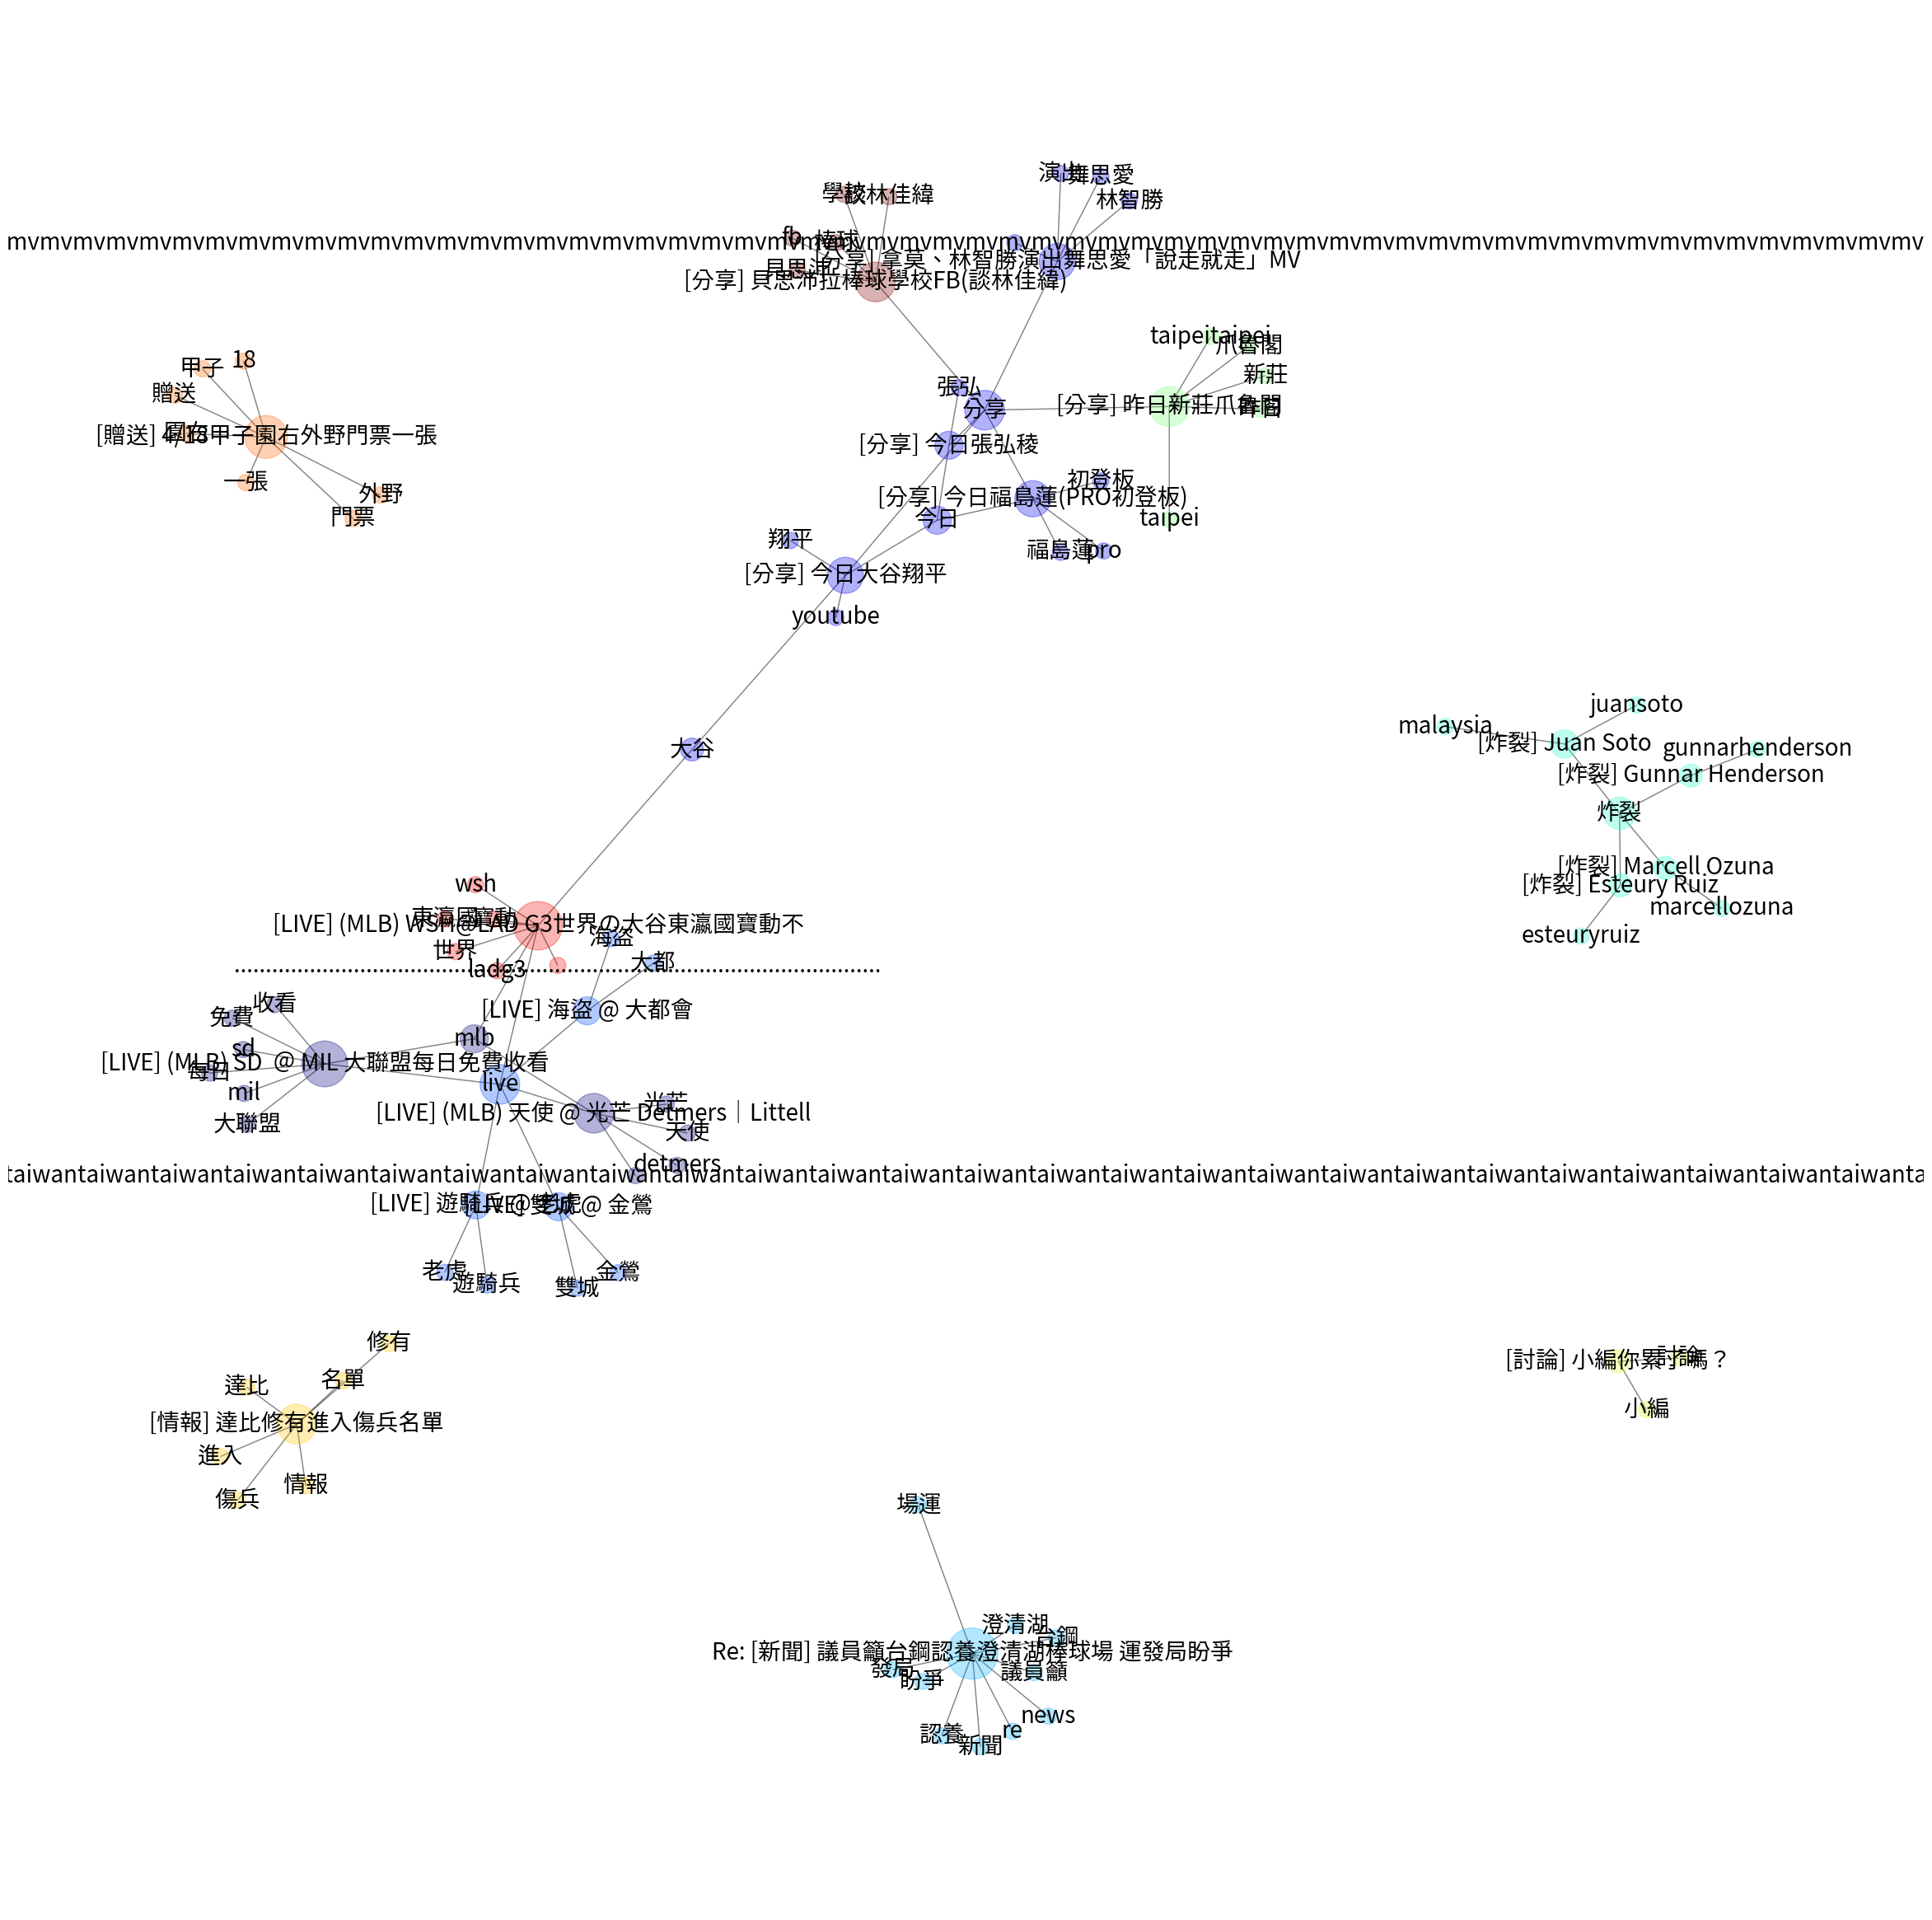

In [39]:
partition = community_louvain.best_partition(G)

community_colors = [partition[node] for node in G.nodes()]

cmap = plt.cm.jet
colors_with_alpha = [cmap(community_color / max(community_colors)) for community_color in community_colors]

colors_with_alpha = [(r, g, b, 0.3) for r, g, b, _ in colors_with_alpha]

node_sizes = [200 * G.degree(node) for node in G.nodes()]

pos = nx.spring_layout(G, k=0.2, iterations=80)

plt.figure(figsize=(30, 30))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color=colors_with_alpha, node_size=node_sizes, cmap=plt.cm.jet)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='Taipei Sans TC Beta')

plt.axis('off')
plt.show()